In [1]:
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

In [2]:
# Training data
data_dir = 'train/'

# Image transformations (data preprocessing)
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Load dataset
dataset = ImageFolder(root=data_dir, transform=transform)

In [3]:
import torch.nn as nn

In [4]:
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(3 * 224 * 224, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.5)
        
    def forward(self, x):
        x = x.view(-1, 3 * 224 * 224)  # Flatten the input tensor
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.dropout(self.relu(self.fc2(x)))
        x = self.fc3(x)
        return x

In [23]:
import torch
import torch.optim as optim
from torch.utils.data import DataLoader
from tqdm import tqdm

In [24]:
# Define the Net
net = ANN()

# Define the hyperparameters
batch_size = 32
learning_rate = 0.001
num_epochs = 20

# Create a data loader for the dataset
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

In [26]:
# Train the model
for epoch in tqdm(range(num_epochs), desc='Epoch Progress'):
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(train_loader):
        inputs, labels = data
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        #if i % 100 == 99:    # Print 100 mini batches
            #print(f'Epoch {epoch+1}, Batch {i+1}/{len(train_loader)}, Loss: {running_loss/100:.4f}')
            #running_loss = 0.0
    epoch_loss = running_loss/len(train_loader)
    epoch_acc = 100*correct/total
    print(f"Epoch {epoch+1} Loss: {epoch_loss:.4f} Accuracy: {epoch_acc:.2f}%")

Epoch Progress:   5%|█████▋                                                                                                            | 1/20 [02:58<56:31, 178.49s/it]

Epoch 1 Loss: 428.6994 Accuracy: 12.32%


Epoch Progress:  10%|███████████▍                                                                                                      | 2/20 [04:42<40:28, 134.92s/it]

Epoch 2 Loss: 78.4648 Accuracy: 10.57%


Epoch Progress:  15%|█████████████████                                                                                                 | 3/20 [06:32<34:57, 123.41s/it]

Epoch 3 Loss: 74.5694 Accuracy: 10.32%


Epoch Progress:  20%|██████████████████████▊                                                                                           | 4/20 [08:17<30:56, 116.05s/it]

Epoch 4 Loss: 75.2566 Accuracy: 10.39%


Epoch Progress:  25%|████████████████████████████▌                                                                                     | 5/20 [09:56<27:30, 110.03s/it]

Epoch 5 Loss: 74.4600 Accuracy: 10.00%


Epoch Progress:  30%|██████████████████████████████████▏                                                                               | 6/20 [11:34<24:41, 105.80s/it]

Epoch 6 Loss: 73.8047 Accuracy: 9.68%


Epoch Progress:  35%|███████████████████████████████████████▉                                                                          | 7/20 [13:12<22:21, 103.23s/it]

Epoch 7 Loss: 73.9584 Accuracy: 9.93%


Epoch Progress:  40%|█████████████████████████████████████████████▌                                                                    | 8/20 [14:50<20:18, 101.56s/it]

Epoch 8 Loss: 74.2555 Accuracy: 9.79%


Epoch Progress:  45%|███████████████████████████████████████████████████▎                                                              | 9/20 [16:28<18:24, 100.37s/it]

Epoch 9 Loss: 73.7503 Accuracy: 9.54%


Epoch Progress:  50%|█████████████████████████████████████████████████████████                                                         | 10/20 [18:06<16:36, 99.65s/it]

Epoch 10 Loss: 73.7187 Accuracy: 10.07%


Epoch Progress:  55%|██████████████████████████████████████████████████████████████▋                                                   | 11/20 [19:43<14:52, 99.12s/it]

Epoch 11 Loss: 73.8043 Accuracy: 9.32%


Epoch Progress:  60%|████████████████████████████████████████████████████████████████████▍                                             | 12/20 [21:22<13:11, 98.93s/it]

Epoch 12 Loss: 73.5334 Accuracy: 9.00%


Epoch Progress:  65%|██████████████████████████████████████████████████████████████████████████                                        | 13/20 [23:00<11:30, 98.69s/it]

Epoch 13 Loss: 73.2723 Accuracy: 9.57%


Epoch Progress:  70%|███████████████████████████████████████████████████████████████████████████████▊                                  | 14/20 [24:38<09:50, 98.47s/it]

Epoch 14 Loss: 73.7069 Accuracy: 9.46%


Epoch Progress:  75%|█████████████████████████████████████████████████████████████████████████████████████▌                            | 15/20 [26:16<08:11, 98.29s/it]

Epoch 15 Loss: 73.5335 Accuracy: 9.29%


Epoch Progress:  80%|███████████████████████████████████████████████████████████████████████████████████████████▏                      | 16/20 [27:54<06:32, 98.17s/it]

Epoch 16 Loss: 73.4393 Accuracy: 9.32%


Epoch Progress:  85%|████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 17/20 [29:32<04:54, 98.14s/it]

Epoch 17 Loss: 73.3578 Accuracy: 9.46%


Epoch Progress:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 18/20 [31:10<03:16, 98.19s/it]

Epoch 18 Loss: 73.4518 Accuracy: 9.36%


Epoch Progress:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 19/20 [32:48<01:38, 98.16s/it]

Epoch 19 Loss: 73.6768 Accuracy: 10.21%


Epoch Progress: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [34:26<00:00, 103.35s/it]

Epoch 20 Loss: 73.4592 Accuracy: 9.14%


In [27]:
# Saved model
PATH = './ANNModel2.pth'
torch.save(net.state_dict(), PATH)

In [36]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [29]:
test_datadir = "test/"
test_dataset = ImageFolder(root=test_datadir, transform=transform)
test_dataloader = DataLoader(test_dataset, batch_size=64)

Accuracy: 0.1


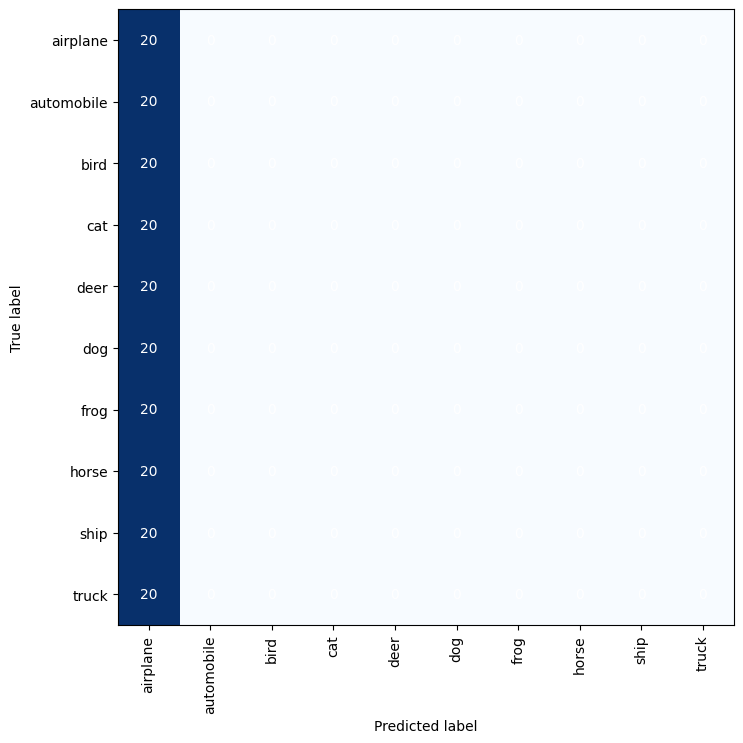

In [37]:
# Load the trained model
model = ANN()
model.load_state_dict(torch.load(PATH))
model.eval()

# Evaluate the model on the test dataset
y_true = []
y_pred = []
with torch.no_grad():
    for inputs, labels in test_dataloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Compute the accuracy and confusion matrix
accuracy = sum([1 if y_true[i] == y_pred[i] else 0 for i in range(len(y_true))]) / len(y_true)
print("Accuracy:", accuracy)

classes = dataset.classes
conf_matrix = confusion_matrix(y_true, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(conf_matrix, cmap=plt.cm.Blues)
ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(classes, rotation=90)
ax.set_yticklabels(classes)
for i in range(len(classes)):
    for j in range(len(classes)):
        ax.text(j, i, conf_matrix[i, j], ha="center", va="center", color="white")
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()